In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

Задания из методички

In [15]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

In [16]:
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [17]:
X = data.x
y = data.y

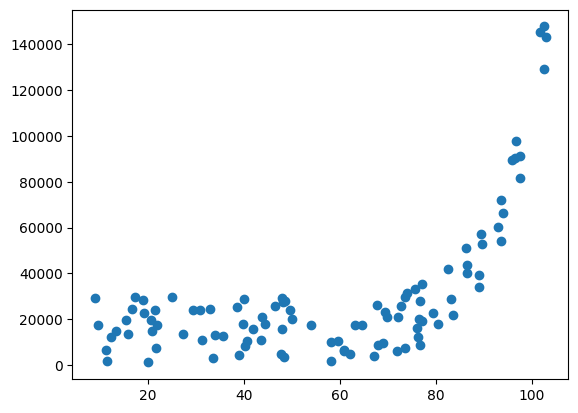

In [18]:
plt.scatter(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


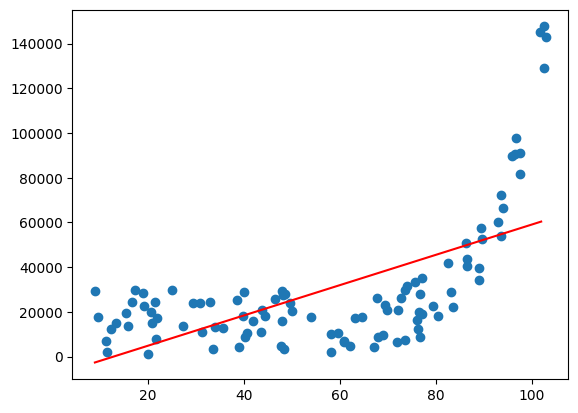

In [19]:
X = pd.DataFrame(X)


linear = LinearRegression().fit(X, y)
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [20]:
linear.score(X, y)

0.37467360318911636

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


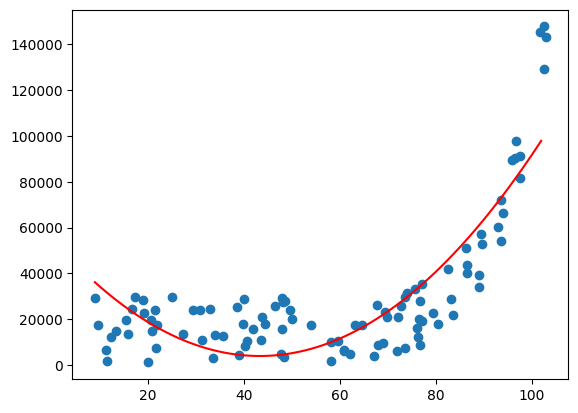

In [21]:
transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
X_2 = transformation.transform(X)
poly_2d = LinearRegression().fit(X_2, y)
xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

Задания на классификацию

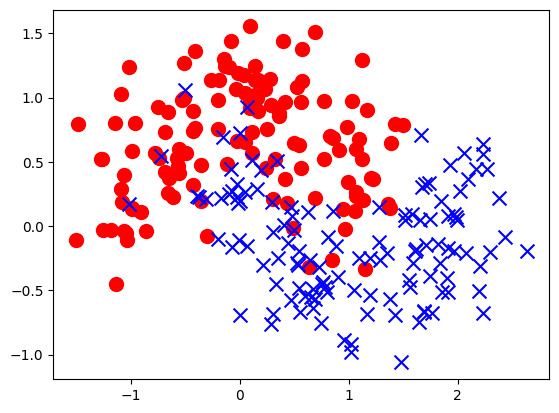

In [22]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",index_col=0)

y = data.y
X = data.drop(["y"], axis=1)

plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


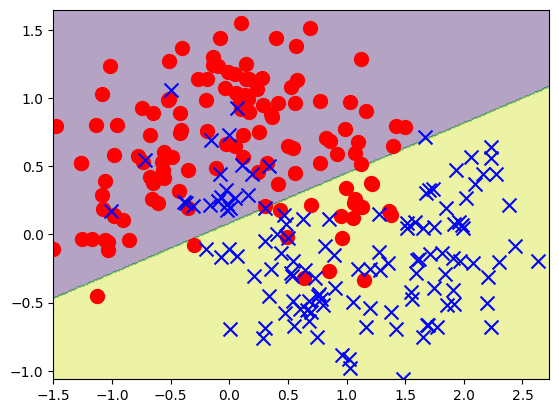

In [23]:
logistic = LogisticRegression().fit(X, y)
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


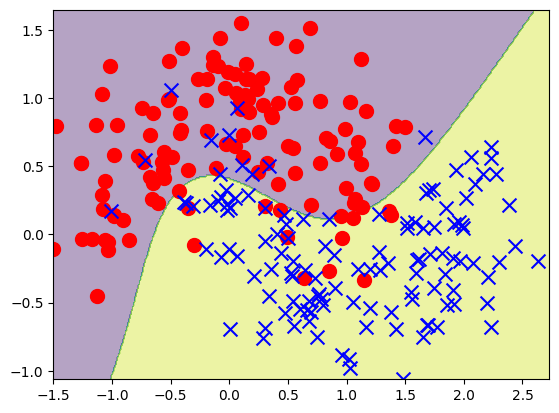

In [24]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)
class_3 = LogisticRegression().fit(X_3, y)
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [25]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)


reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.699747189010915

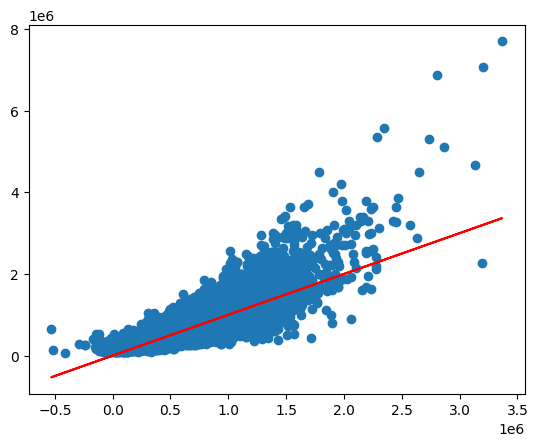

In [27]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

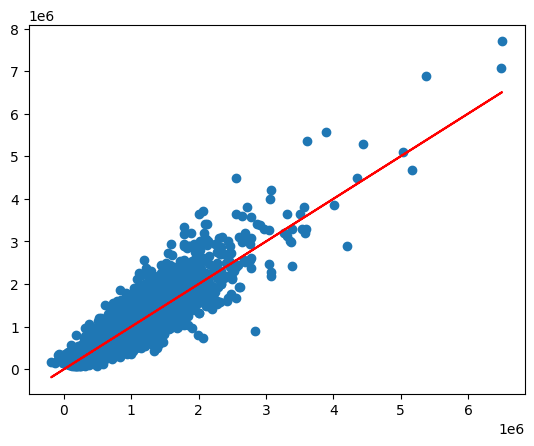

In [28]:
poly_features_kc_prices = PolynomialFeatures(degree=2)
X_3_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices)
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

Задания для самостоятельного выполнения

1) В выполненной работе добавьте замер времени обучения каждой модели.

In [29]:
import time

time.time()

1702407200.7979746

2) На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

In [30]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

X = data.x
y = data.y

X = pd.DataFrame(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


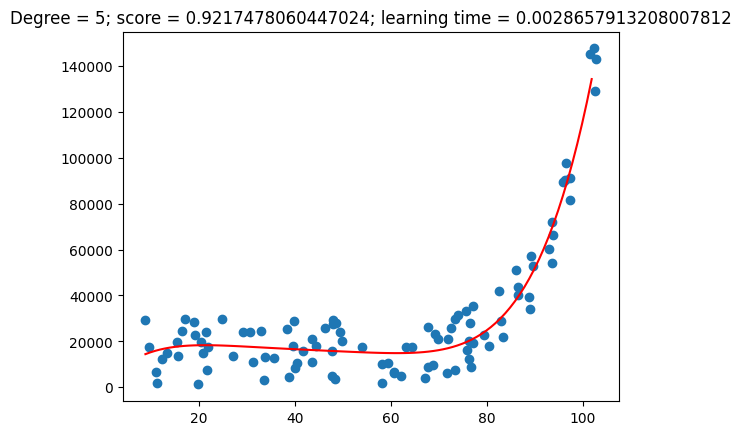

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


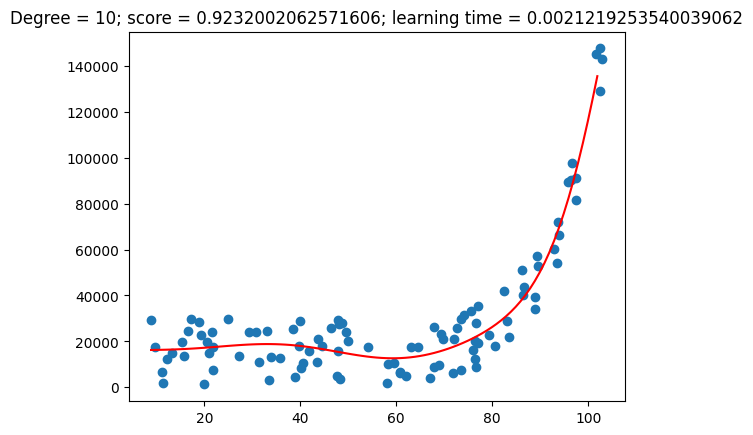

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


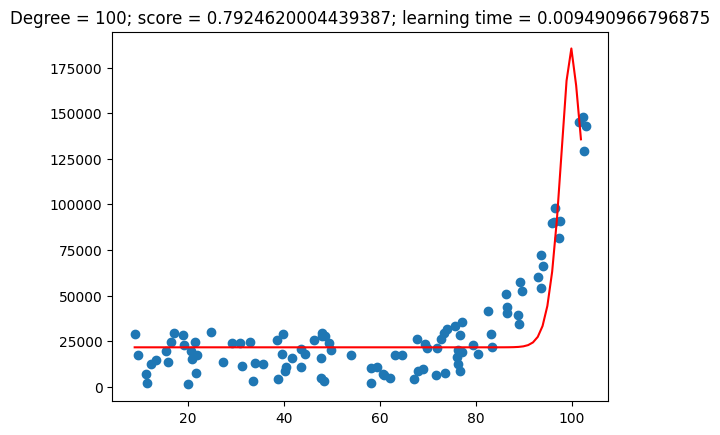

In [31]:
def gen_regression (X, y, degree):
  transformation = PolynomialFeatures(degree=degree)
  transformation.fit(X)
  X_trans = transformation.transform(X)
  start = time.time()
  poly = LinearRegression().fit(X_trans, y)
  stop = time.time()
  xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
  xx_trans = transformation.transform(pd.DataFrame(xx))
  yy_trans = poly.predict(xx_trans)
  yy = poly.predict(pd.DataFrame(xx_trans))
  plt.scatter(X.x, y)
  plt.plot(xx, yy, c='r')
  plt.title(f'Degree = {degree}; score = {poly.score(X_trans, y)}; learning time = {stop - start}')
  plt.show()
  return [poly.score(X_trans, y), stop - start, degree]

gen_reg_data = []
for degree in [5, 10, 100]:
  gen_reg_data.append(gen_regression(X, y, degree))

3) То же самое проделайте с датасетом для классификации и "King county".

In [32]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")



In [33]:
# данные gen_classification
y = data.y
X = data.drop(["y"], axis=1)
# данные King City
y_kc_prices = data_kc_prices.price[:500]
X_kc_prices = data_kc_prices.drop(["id", "date", "price", "yr_renovated", "zipcode","condition", "grade","floors", "long","view", "bedrooms", "bathrooms", "waterfront"], axis=1)[:500]


X_kc_prices.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,sqft_living15,sqft_lot15
0,1180,5650,1180,0,1955,47.5112,1340,5650
1,2570,7242,2170,400,1951,47.7210,1690,7639
2,770,10000,770,0,1933,47.7379,2720,8062
3,1960,5000,1050,910,1965,47.5208,1360,5000
4,1680,8080,1680,0,1987,47.6168,1800,7503


----------------------------------------------------------------------------------------------------
GEN_CLASSIFICATION
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


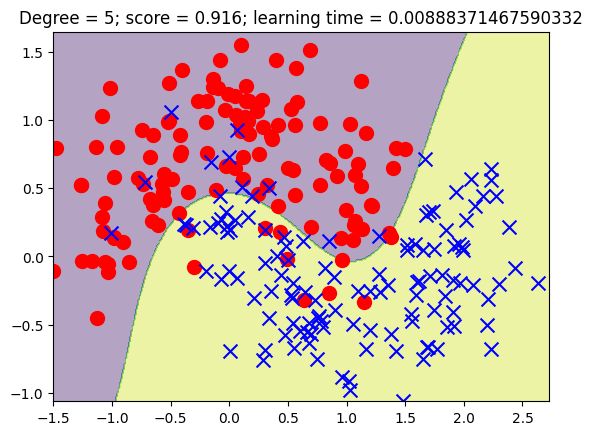

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
GEN_CLASSIFICATION
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


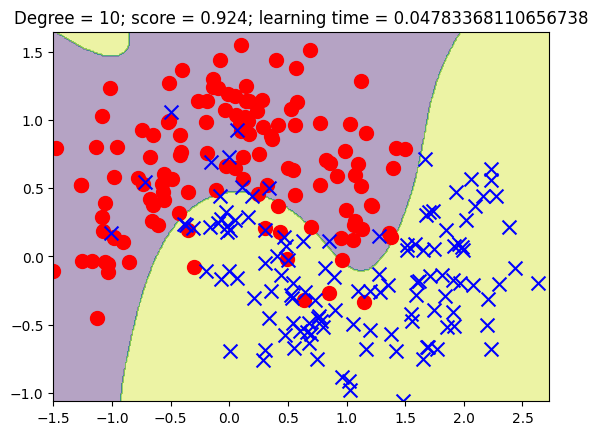

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
GEN_CLASSIFICATION
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


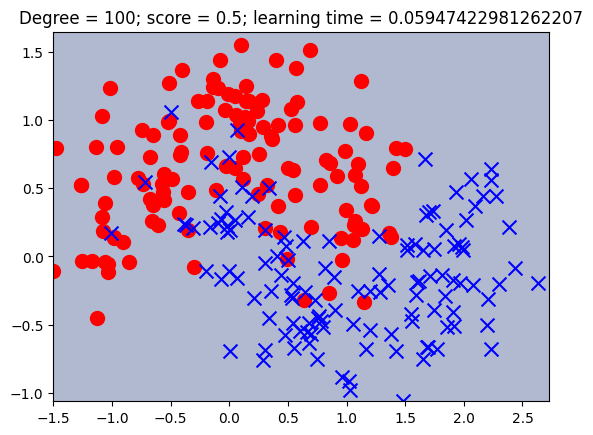

----------------------------------------------------------------------------------------------------
KING CITY
----------------------------------------------------------------------------------------------------


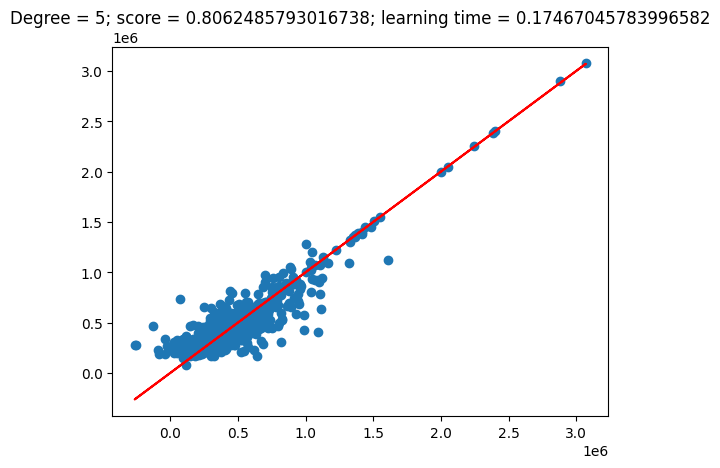

KING CITY
----------------------------------------------------------------------------------------------------


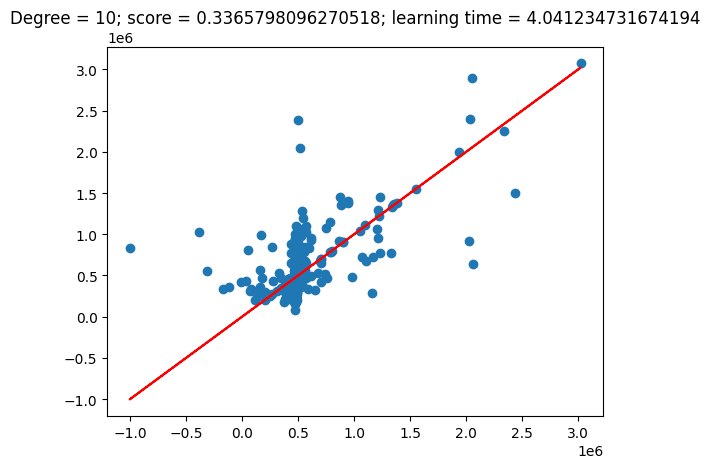

In [34]:

def learning_for_classification(X, y, degree):
  class_transform = PolynomialFeatures(degree=degree)
  X_transf = class_transform.fit_transform(X)
  start = time.time()
  model = LogisticRegression().fit(X_transf, y)
  stop = time.time()

  xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
  XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
  Z = model.predict(class_transform.transform(XX)).reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.4)
  plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
  plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

  plt.title(f'Degree = {degree}; score = {model.score(X_transf, y)}; learning time = {stop - start}')
  plt.show()

  return [model.score(X_transf, y), stop - start, degree]

def learning_for_classification_2(X_kc_prices, y_kc_prices, degree):
  X_kc_prices_ = (poly_features_kc_prices := PolynomialFeatures(degree=degree)).fit_transform(X_kc_prices)
  start = time.time()
  reg_poly_kc = LinearRegression().fit(X_kc_prices_, y_kc_prices)
  stop = time.time()

  y_pred_kc_prices = reg_poly_kc.predict(X_kc_prices_)
  plt.scatter(y_pred_kc_prices, y_kc_prices)
  plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

  plt.title(f'Degree = {degree}; score = {reg_poly_kc.score(X_kc_prices_, y_kc_prices)}; learning time = {stop - start}')
  plt.show()
  return [reg_poly_kc.score(X_kc_prices_, y_kc_prices), stop - start, degree]


list_data_gen_classif = []
list_data_city = []
for degree in [5, 10, 100]:
  print("-"*100)
  print("GEN_CLASSIFICATION")
  print("-"*100)
  list_data_gen_classif.append(learning_for_classification(X, y, degree))
  print("-"*100)
for degree in [5, 10]:
  print("KING CITY")
  print("-"*100)
  list_data_city.append(learning_for_classification_2(X_kc_prices, y_kc_prices, degree))
list_data_city.append([None, None,None,None])

4) Cоставьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.


In [35]:
models = []
degrees =[]
scores = []
times = []

for model, name in [(gen_reg_data, "GEN_REGRESSION"), (list_data_gen_classif, "GEN_CLASSIFICATION"), (list_data_city, "KING CITY")]:
  for type_ in model:
    models.append(name)
    degrees.append(type_[2])
    scores.append(type_[0])
    times.append(type_[1])
pd.DataFrame({"Model": models, "degree":degrees, "score":scores, "time":times})

,Model,degree,score,time
0,GEN_REGRESSION,5.0,0.921748,0.002866
1,GEN_REGRESSION,10.0,0.923200,0.002122
2,GEN_REGRESSION,100.0,0.792462,0.009491
3,GEN_CLASSIFICATION,5.0,0.916000,0.008884
4,GEN_CLASSIFICATION,10.0,0.924000,0.047834
5,GEN_CLASSIFICATION,100.0,0.500000,0.059474
6,KING CITY,5.0,0.806249,0.174670
7,KING CITY,10.0,0.336580,4.041235
8,KING CITY,NaN,NaN,NaN


5) Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [36]:
reg_kc_multiple.coef_

array([-3.57665414e+04,  4.11442785e+04,  1.10442865e+02,  1.28597869e-01,
        6.68955012e+03,  5.82960458e+05,  5.28709424e+04,  2.63856491e+04,
        9.58904452e+04,  7.07852244e+01,  3.96576400e+01, -2.62022321e+03,
        1.98125837e+01, -5.82419866e+02,  6.02748226e+05, -2.14729828e+05,
        2.16814005e+01, -3.82641850e-01])

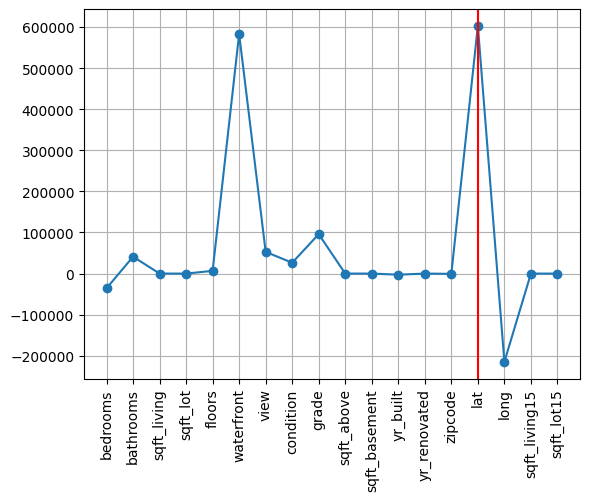

In [37]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)

# for lable, coef in zip(X_kc_prices.columns, reg_kc_multiple.coef_):
#   print(f'Признак: {lable} | Коэфициент : {coef}')
#   print("_"*100)
plt.plot(X_kc_prices.columns, reg_kc_multiple.coef_, marker='o')
plt.xticks(rotation=90)
plt.grid(visible = True)

plt.axvline("lat", color= 'red')
plt.show()

6) Попробуйте также проинтерпретировать полиномиальную модель.

In [38]:
reg_poly2_kc.coef_

array([-5.48035323e+02,  6.80776608e+06,  1.57179321e+07,  1.23093225e+05,
       -3.15082908e+02, -9.11860954e+07,  7.15360903e+07,  1.42764904e+06,
        1.64671722e+06, -1.83079956e+07, -7.72820636e+04, -1.67645955e+05,
        8.48621770e+04,  3.26325199e+04, -5.09489029e+05,  9.81280674e+07,
       -6.16696925e+07, -1.39621240e+04,  3.79445239e+02,  8.95770465e+02,
        1.24670939e+03,  1.05799602e+02,  2.26102138e-02,  2.40697313e+04,
       -3.08712690e+04,  2.97788507e+03, -3.49469835e+03,  1.12641504e+03,
       -1.33295125e+02, -1.25065645e+02, -2.75928814e+02, -1.85892445e+00,
        3.66174346e+01, -2.55227358e+04,  7.07999857e+04,  8.65551861e+00,
        1.16550225e-01, -3.52315485e+03,  1.41334784e+01, -3.92115645e-01,
       -3.14932775e+04,  3.39353494e+04,  6.60426885e+03, -9.67485635e+03,
        1.17966472e+04,  1.97421992e+01, -8.71207506e+00,  1.36943185e+02,
       -2.66095857e+01, -3.00594017e+02,  6.24676866e+04, -8.59379377e+04,
       -7.39239861e+00,  